In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import pyximport; pyximport.install()
import sys
from IPython.display import SVG

BOXSIMU_PATH = '/home/aschi/Documents/MyPrivateRepo/boxsimu_project/'
if not BOXSIMU_PATH in sys.path:
    sys.path.append(BOXSIMU_PATH)
    
import boxsimu
from boxsimu import ur

In [6]:
# -*- coding: utf-8 -*-

import sys
import copy
import numpy as np
import datetime

from matplotlib import pyplot as plt

BOXSIMU_PATH = '/home/aschi/Documents/MyPrivateRepo/boxsimu_project/'
if not BOXSIMU_PATH in sys.path:
    sys.path.append(BOXSIMU_PATH)

from boxsimu.simulations import boxmodelsystem3
from boxsimu import ur

system = boxmodelsystem3.get_system()

A :
id(box.variables[var_name]):  139648333538696
id(self.variables[var_name]):  139648470832912
A :
id(box.variables[var_name]):  139648333538024
id(self.variables[var_name]):  139648470832912
B :
id(box.variables[var_name]):  139648333538136
id(self.variables[var_name]):  139648470831568
B :
id(box.variables[var_name]):  139648336621016
id(self.variables[var_name]):  139648470831568
C :
id(box.variables[var_name]):  139648333127464
id(self.variables[var_name]):  139648333124608
C :
id(box.variables[var_name]):  139648333140824
id(self.variables[var_name]):  139648333124608
D :
id(box.variables[var_name]):  139648333141776
id(self.variables[var_name]):  139648333124664
D :
id(box.variables[var_name]):  139648333142784
id(self.variables[var_name]):  139648333124664


In [20]:
from boxsimu import solution
sol = solution.Solution(system, 100, ur.second)
sol.df_ts_rates

Empty DataFrame
Columns: [(box1, A, flows), (box1, A, fluxes), (box1, A, processes), (box1, A, reactions), (box1, A, flow_Inflow), (box1, A, flow_Inflow), (box1, A, reaction_Reaction1), (box1, A, reaction_Reaction2), (box1, B, flows), (box1, B, fluxes), (box1, B, processes), (box1, B, reactions), (box1, B, flow_Inflow), (box1, B, flow_Inflow), (box1, B, reaction_Reaction1), (box1, B, reaction_Reaction2), (box1, C, flows), (box1, C, fluxes), (box1, C, processes), (box1, C, reactions), (box1, C, flow_Inflow), (box1, C, flow_Inflow), (box1, C, reaction_Reaction1), (box1, C, reaction_Reaction2), (box1, D, flows), (box1, D, fluxes), (box1, D, processes), (box1, D, reactions), (box1, D, flow_Inflow), (box1, D, flow_Inflow), (box1, D, reaction_Reaction1), (box1, D, reaction_Reaction2), (box2, A, flows), (box2, A, fluxes), (box2, A, processes), (box2, A, reactions), (box2, A, flow_Outflow), (box2, A, flow_Inflow), (box2, A, reaction_Reaction1), (box2, A, reaction_Reaction2), (box2, B, flows), (box2, B, fluxes), (box2, B, processes), (box2, B, reactions), (box2, B, flow_Outflow), (box2, B, flow_Inflow), (box2, B, reaction_Reaction1), (box2, B, reaction_Reaction2), (box2, C, flows), (box2, C, fluxes), (box2, C, processes), (box2, C, reactions), (box2, C, flow_Outflow), (box2, C, flow_Inflow), (box2, C, reaction_Reaction1), (box2, C, reaction_Reaction2), (box2, D, flows), (box2, D, fluxes), (box2, D, processes), (box2, D, reactions), (box2, D, flow_Outflow), (box2, D, flow_Inflow), (box2, D, reaction_Reaction1), (box2, D, reaction_Reaction2)]
Index: []

[0 rows x 64 columns]

In [8]:
system.save_as_svg('test_svg')

corners [(330.0, 0.0), (630.0, 0.0), (630.0, 300.0), (330.0, 300.0)]
corners [(330.0, 0.0), (630.0, 0.0), (630.0, 300.0), (330.0, 300.0)]
corners [(-330.0, 4.0413344371862656e-14), (-30.0, 4.0413344371862656e-14), (-30.0, 300.00000000000006), (-330.0, 300.00000000000006)]
corners [(-330.0, 4.0413344371862656e-14), (-30.0, 4.0413344371862656e-14), (-30.0, 300.00000000000006), (-330.0, 300.00000000000006)]


In [15]:
from boxsimu import dimensionality_validation
from boxsimu import ur

@dimensionality_validation.decorator_raise_if_not_mass_per_time
def random_pint_unit_function(arg1, arg2):
    return arg1 * arg2 * ur.meter

random_pint_unit_function(1*ur.kg, 1/ur.second/ur.meter)

<Quantity(1.0, 'kilogram / second')>

In [16]:
random_pint_unit_function._verified = True
random_pint_unit_function._verified

True

In [39]:
import pandas as pd
boxes = ['box1', 'box2', 'boxz']
quantities = ['mass', 'volume', 'A', 'B', 'C', 'D']
processes = ['proc1', 'reaction3', 'flow8']
col_tuples = [(box, quant, proc) 
              for box in boxes 
              for quant in quantities 
              for proc in processes]
col_tuples
index = pd.MultiIndex.from_tuples(col_tuples, names=['first', 'second', 'third'])
df1 = pd.DataFrame(index=index)
df1 = df1.T
df1

Empty DataFrame
Columns: [(box1, mass, proc1), (box1, mass, reaction3), (box1, mass, flow8), (box1, volume, proc1), (box1, volume, reaction3), (box1, volume, flow8), (box1, A, proc1), (box1, A, reaction3), (box1, A, flow8), (box1, B, proc1), (box1, B, reaction3), (box1, B, flow8), (box1, C, proc1), (box1, C, reaction3), (box1, C, flow8), (box1, D, proc1), (box1, D, reaction3), (box1, D, flow8), (box2, mass, proc1), (box2, mass, reaction3), (box2, mass, flow8), (box2, volume, proc1), (box2, volume, reaction3), (box2, volume, flow8), (box2, A, proc1), (box2, A, reaction3), (box2, A, flow8), (box2, B, proc1), (box2, B, reaction3), (box2, B, flow8), (box2, C, proc1), (box2, C, reaction3), (box2, C, flow8), (box2, D, proc1), (box2, D, reaction3), (box2, D, flow8), (boxz, mass, proc1), (boxz, mass, reaction3), (boxz, mass, flow8), (boxz, volume, proc1), (boxz, volume, reaction3), (boxz, volume, flow8), (boxz, A, proc1), (boxz, A, reaction3), (boxz, A, flow8), (boxz, B, proc1), (boxz, B, reaction3), (boxz, B, flow8), (boxz, C, proc1), (boxz, C, reaction3), (boxz, C, flow8), (boxz, D, proc1), (boxz, D, reaction3), (boxz, D, flow8)]
Index: []

[0 rows x 54 columns]

In [17]:
system.solve(200*ur.month, 0.5*ur.month)

Start solving the BoxModelSystem...
- total integration time: 200.0 month
- dt (time step): 0.5 month
- number of time steps: 400


NameError: name 'cols' is not defined

In [9]:
import cProfile
import re
cProfile.run('system.solve(200*ur.month, 0.5*ur.month)', 'restats')

Start solving the box model...
- total integration time: 200 month
- dt (time step): 0.5 month
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
Function "solve(...)" used 19.288s


In [10]:
import pstats
p = pstats.Stats('restats')

In [11]:
p.strip_dirs().sort_stats(-1).print_stats()

Fri Sep 22 12:33:18 2017    restats

         24163316 function calls (24030395 primitive calls) in 19.297 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.001    0.001   19.297   19.297 <string>:1(<module>)
   440102    0.385    0.000    0.654    0.000 __init__.py:82(_to_magnitude)
   233832    0.152    0.000    0.203    0.000 _collections_abc.py:672(keys)
   244810    0.149    0.000    0.199    0.000 _collections_abc.py:676(items)
   478642    0.101    0.000    0.101    0.000 _collections_abc.py:698(__init__)
        4    0.000    0.000    0.000    0.000 _collections_abc.py:701(__len__)
   549673    0.225    0.000    0.367    0.000 _collections_abc.py:719(__iter__)
   462026    0.319    0.000    0.533    0.000 _collections_abc.py:742(__iter__)
     3200    0.002    0.000    0.026    0.000 _methods.py:31(_sum)
     2400    0.002    0.000    0.023    0.000 _methods.py:37(_any)
  1348632    0.559    0.000    0.

In [12]:
p.sort_stats('cumulative').print_stats(20)

Fri Sep 22 12:33:18 2017    restats

         24163316 function calls (24030395 primitive calls) in 19.297 seconds

   Ordered by: cumulative time
   List reduced from 287 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   19.297   19.297 {built-in method builtins.exec}
        1    0.001    0.001   19.297   19.297 <string>:1(<module>)
        1    0.000    0.000   19.296   19.296 system.py:874(solve)
        1    0.041    0.041   19.292   19.292 solver.py:42(solve)
      400    0.019    0.000   17.912    0.045 solver.py:189(_calculate_changes_of_all_variables)
      400    0.006    0.000   16.981    0.042 solver.py:212(<listcomp>)
     1600    0.033    0.000   16.976    0.011 solver.py:326(_get_dvar)
     1600    0.053    0.000    6.311    0.004 solver.py:243(_get_sink_source_flow)
   136406    0.197    0.000    6.262    0.000 quantity.py:49(wrapped)
   136406    0.826    0.000    6.065    0.000 quantity

In [13]:
p.sort_stats('time').print_stats(10)

Fri Sep 22 12:33:18 2017    restats

         24163316 function calls (24030395 primitive calls) in 19.297 seconds

   Ordered by: internal time
   List reduced from 287 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  5132569    1.294    0.000    2.648    0.000 {built-in method builtins.isinstance}
   310009    0.984    0.000    1.800    0.000 util.py:251(__init__)
   136406    0.826    0.000    6.065    0.000 quantity.py:746(_mul_div)
   847267    0.795    0.000    1.354    0.000 abc.py:178(__instancecheck__)
   218392    0.601    0.000    2.243    0.000 {built-in method _operator.mul}
  1348632    0.559    0.000    0.559    0.000 _weakrefset.py:70(__contains__)
   342906    0.553    0.000    1.195    0.000 quantity.py:85(__new__)
   711697    0.532    0.000    0.630    0.000 util.py:313(__eq__)
   109196    0.485    0.000    1.642    0.000 util.py:339(__mul__)
    81212    0.458    0.000    1.398    0.000 util.py:363(__truediv_

In [14]:
%time
sol = system.solve(200*ur.month, 1*ur.month)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
Start solving the box model...
- total integration time: 200 month
- dt (time step): 1 month
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
Function "solve(...)" used 5.919s


ValueError: x and y must have same first dimension, but have shapes (202,) and (201,)

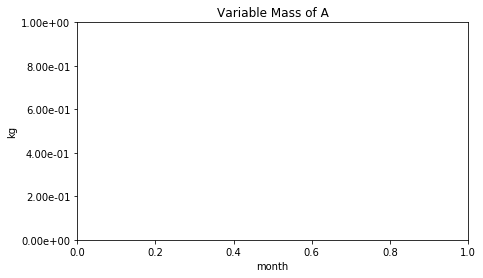

In [15]:
sol.plot_variable_mass_of_all_boxes(system.variables.A, yaxis_log=False)

ValueError: x and y must have same first dimension, but have shapes (202,) and (201,)

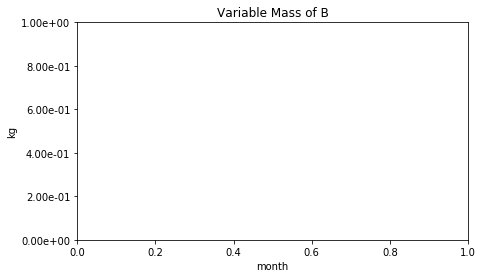

In [16]:
sol.plot_variable_mass_of_all_boxes(system.variables.B, yaxis_log=False)

In [ ]:
sol.plot_variable_mass_of_all_boxes(system.variables.C, yaxis_log=False)

In [ ]:
sol.plot_variable_mass_of_all_boxes(system.variables.D, yaxis_log=False)

In [ ]:
sol.plot_total_variable_masses()

In [19]:
system.save_as_svg('system3.svg')

corners [(330.0, 0.0), (630.0, 0.0), (630.0, 300.0), (330.0, 300.0)]
corners [(330.0, 0.0), (630.0, 0.0), (630.0, 300.0), (330.0, 300.0)]
corners [(-330.0, 4.0413344371862656e-14), (-30.0, 4.0413344371862656e-14), (-30.0, 300.00000000000006), (-330.0, 300.00000000000006)]
corners [(-330.0, 4.0413344371862656e-14), (-30.0, 4.0413344371862656e-14), (-30.0, 300.00000000000006), (-330.0, 300.00000000000006)]


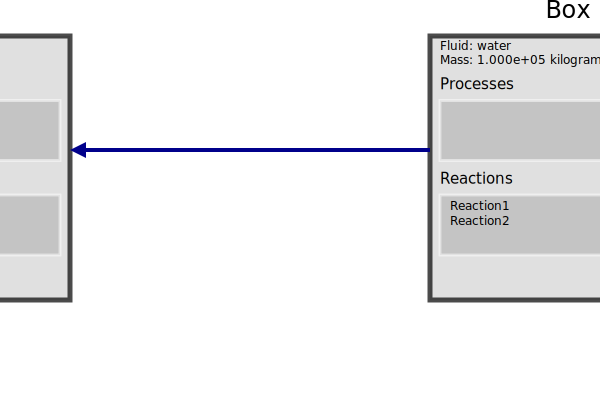

In [20]:
SVG('system3.svg')

In [45]:
import pandas as pd

In [47]:
a = np.ones(10)*ur.meter

In [48]:
pd.dataframe

AttributeError: module 'pandas' has no attribute 'dataframe'

In [54]:
b = {'lake': {'phosphate': pd.Series(a)}}

In [62]:
pd.Series(a)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
dtype: float64

In [7]:
import numpy as np

In [13]:
time_array = np.arange(0, 100)
cols = [('1', 'A'), ('1', 'B'), ('2', 'A'), ('2', 'B')]

In [17]:
df = pd.DataFrame(index=time_array, columns=cols)
df.columns = pd.MultiIndex.from_tuples(df.columns)
df

1         2     
      A    B    A    B
0   NaN  NaN  NaN  NaN
1   NaN  NaN  NaN  NaN
2   NaN  NaN  NaN  NaN
3   NaN  NaN  NaN  NaN
4   NaN  NaN  NaN  NaN
5   NaN  NaN  NaN  NaN
6   NaN  NaN  NaN  NaN
7   NaN  NaN  NaN  NaN
8   NaN  NaN  NaN  NaN
9   NaN  NaN  NaN  NaN
10  NaN  NaN  NaN  NaN
11  NaN  NaN  NaN  NaN
12  NaN  NaN  NaN  NaN
13  NaN  NaN  NaN  NaN
14  NaN  NaN  NaN  NaN
15  NaN  NaN  NaN  NaN
16  NaN  NaN  NaN  NaN
17  NaN  NaN  NaN  NaN
18  NaN  NaN  NaN  NaN
19  NaN  NaN  NaN  NaN
20  NaN  NaN  NaN  NaN
21  NaN  NaN  NaN  NaN
22  NaN  NaN  NaN  NaN
23  NaN  NaN  NaN  NaN
24  NaN  NaN  NaN  NaN
25  NaN  NaN  NaN  NaN
26  NaN  NaN  NaN  NaN
27  NaN  NaN  NaN  NaN
28  NaN  NaN  NaN  NaN
29  NaN  NaN  NaN  NaN
..  ...  ...  ...  ...
70  NaN  NaN  NaN  NaN
71  NaN  NaN  NaN  NaN
72  NaN  NaN  NaN  NaN
73  NaN  NaN  NaN  NaN
74  NaN  NaN  NaN  NaN
75  NaN  NaN  NaN  NaN
76  NaN  NaN  NaN  NaN
77  NaN  NaN  NaN  NaN
78  NaN  NaN  NaN  NaN
79  NaN  NaN  NaN  NaN
80  NaN  NaN  NaN  NaN
81  NaN  NaN  NaN  NaN
82  NaN  NaN  NaN  NaN
83  NaN  NaN  NaN  NaN
84  NaN  NaN  NaN  NaN
85  NaN  NaN  NaN  NaN
86  NaN  NaN  NaN  NaN
87  NaN  NaN  NaN  NaN
88  NaN  NaN  NaN  NaN
89  NaN  NaN  NaN  NaN
90  NaN  NaN  NaN  NaN
91  NaN  NaN  NaN  NaN
92  NaN  NaN  NaN  NaN
93  NaN  NaN  NaN  NaN
94  NaN  NaN  NaN  NaN
95  NaN  NaN  NaN  NaN
96  NaN  NaN  NaN  NaN
97  NaN  NaN  NaN  NaN
98  NaN  NaN  NaN  NaN
99  NaN  NaN  NaN  NaN

[100 rows x 4 columns]

In [23]:
system.box_list[0].id

0

In [23]:
list(zip(['1', '2'], ['A', 'B']))

[('1', 'A'), ('2', 'B')]

In [39]:
2 * ur.kg  * np.array([1,2,3])

<Quantity([2 4 6], 'kilogram')>

In [44]:
a = 3.3

In [45]:
isinstance(a, int)

False

In [1]:
import pandas as pd

In [ ]:
pd.DataFrame('')

In [25]:
class MyBaseException(Exception):
    DEFAULT_MESSAGE = None
    
    def __init__(self, message=None):
        if message:
            self.message = message
        else:
            self.message = self.DEFAULT_MESSAGE
        super().__init__(self.message)

        
class MyTestException(MyBaseException):
    DEFAULT_MESSAGE = 'YEAH IM THE default text of MyTestException!!'
    
    
myex = MyTestException()
raise myex

MyTestException: YEAH IM THE default text of MyTestException!!

Exception: bla

In [62]:
import pint 
from boxsimu import dimensionality_validation as bs_dim_val
from boxsimu import errors as bs_errors
from keyword import iskeyword


class BaseDictDescriptor:
    """Check if keys and values are instances of the correct class."""
    def __init__(self, name, key_class, value_class):
        self.name = '_' + name
        self.name_raw = name
        self.key_class = key_class
        self.value_class = value_class
        
    def __get__(self, instance, instance_type):
        return getattr(instance, self.name)
    
    def __set__(self, instance, value):
        if instance is None: return self
        if value is None: return 
        self.check_key_value_types(value)
        setattr(instance, self.name, value)
        
    def check_key_value_types(self, value):
        if not isinstance(value, dict):
            raise bs_errors.NotInstanceOfError(self.name_raw, 'dict')
        for k, v in value.items():
            if not isinstance(k, self.key_class):
                raise bs_errors.DictKeyNotInstanceOfError(
                    self.name_raw, self.key_class)
            if not isinstance(v, self.value_class):
                raise bs_errors.DictValueNotInstanceOfError(
                    self.name_raw, self.value_class)
        
        
class DictValuePintQuantityDescriptor(BaseDictDescriptor):
    """Check if keys have the correct type and values are pint quantites."""
    def __init__(self, name, key_class, *units):
        super().__init__(name, key_class, pint.quantity._Quantity)
        self.units = units
    
    def check_key_value_types(self, value):
        super().check_key_value_types(value)
        for k, v in value.items():
            bs_dim_val.raise_if_not(v, *self.units)
        
            
class A:
    dict1 = DictValuePintQuantityDescriptor('dict1', int, ur.meter/ur.second)
    
    def __init__(self, dict1):
        self.dict1 = dict1

a = A({1: 3*ur.meter/ur.second})
print(a.dict1)
a.dict1 = {3: 4*ur.meter/ur.hour}
print(a.dict1)

{1: <Quantity(3.0, 'meter / second')>}
{3: <Quantity(4.0, 'meter / hour')>}


In [34]:
class VariableConcentrationDictDescriptor:
    """Check correct pint-dimensionality of attribute."""
    def __init__(self, name, units, default=None):
        self.name = '_' + name
        self.units = units
        self.default = default

    def __get__(self, instance, instance_type):
        return getattr(instance, self.name, self.default)
    
    def __set__(self, instance, value):
        if instance is None: return self
        if value is None: return 
        if callable(value):
            func_decorator = bs_dim_val.decorator_raise_if_not(self.units)
            setattr(instance, self.name, func_decorator(value))
        else:
            bs_dim_val.raise_if_not(value, self.units)
            setattr(instance, self.name, value.to_base_units())


In [3]:
%load_ext Cython

In [29]:
from boxsimu import dimensionality_validation as bs_dim_val
from keyword import iskeyword


class PintQuantityDescriptor:
    """Check correct pint-dimensionality of attribute."""
    def __init__(self, name, units, default=None):
        self.name = '_' + name
        self.name_raw = name
        self.units = units
        self.default = default

    def __get__(self, instance, instance_type):
        if self.is_static:
            return getattr(instance, self.name, self.default)
        else:
            raise ValueError('{0} is not a constant. {0} must be called '
                'as a function'.format(self.name_raw))
    
    def __set__(self, instance, value):
        if instance is None: return self
        if value is None: return
        if callable(value):
            self.is_static = False
            self.is_dynamic = True
            setattr(instance, self.name, value)
        else:
            self.is_static = True
            self.is_dynamic = False
            bs_dim_val.raise_if_not(value, self.units)
            setattr(instance, self.name, value.to_base_units())

    def __call__(self, time, condition, system):
        if callable(self.value):
            return self.value(time, condition, system)
        else:
            return getattr(instance, self.name, self.default)
        

In [30]:
class A:
    rate = PintQuantityDescriptor('rate', ur.meter/ur.second)
    
    def __init__(self, rate):
        self.rate = rate

a = A(lambda t, c, sys: t*ur.meter/ur.second)

In [31]:
a.rate(0, 0, 0)

AttributeError: 'PintQuantityDescriptor' object has no attribute 'value'

In [9]:
l = [1, False, False]

In [10]:
any(l)

True

In [12]:
class A:
    pass

a = A()

__main__.A

In [8]:
def a():
    pass

type(a)

[autoreload of boxsimu.transport failed: Traceback (most recent call last):
  File "/home/aschi/Envs/boxsimu/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/home/aschi/Envs/boxsimu/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 369, in superreload
    module = reload(module)
  File "/home/aschi/Envs/boxsimu/lib/python3.6/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/aschi/Envs/boxsimu/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 608, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 205, in _call_with_frames_removed
  File "/home/aschi/Documents/MyPrivateRepo/boxsimu_project/boxsimu/transport.py", line 140, in <module>
    class Flow(BaseTransport):
  File "/home/aschi/Documents

function

In [10]:
isinstance(a, type(lambda a: a))

True

In [11]:
a_type = type(a)

In [14]:
a_type.mro()

[function, object]